In [45]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [46]:
df_ = gpd.read_file('../export/master/master_acc_bike_pop_street.geojson')

In [47]:
keep_cols = ['BFSNR', 'YES_IN_PER', 'BIKE_STREET_PER', 'ACCIDENTS' ,'POP_TOTAL', 'GMDNAME', 'BZNR', 'KTNR', 'geometry']

In [48]:
base = df_[keep_cols]

In [49]:
def plot_map(gdf, good_bike):    
    # Set the figure size
    gdf['VALUE'] = pd.Categorical(gdf['VALUE'])
    
    plt.figure(figsize=(1920,1080), dpi=3500)

    # Plot the GeoDataFrame with 'VALUE' column as the color
    gdf.plot(column='VALUE', cmap='coolwarm', legend=True)

    # Add a title and axis labels
    plt.title(f"Map with good_bike = {good_bike}%")
    plt.xlabel('LON')
    plt.ylabel("LAT")

    # Show the plot
    #plt.savefig(f'map/map_{np.round(good_bike,1)}.png', dpi=600)
    plt.show()


In [50]:
def comparison(df):
    #mean_yes = np.round(df.YES_IN_PER.mean(),2)
    mean_yes = np.round(df.YES_IN_PER.mean(),2)
    print(mean_yes)

    velo = [0.0499,0.0538,0.07373,0.07689,0.06192,0.07163]
    #https://www.prixvelo.ch/de/prix-velo-infrastruktur
    #0.0499 Biel
    #0.0538 Chur
    #0.07373 Solothurn
    #0.07689 Basel
    #0.06192 Luzern
    #0.07163 Bern
    good_bike = np.mean(velo)
    
    #good_bike = df.BIKE_STREET_PER.quantile(0.66)
    #good_bike = df.BIKE_STREET_PER.mean()

    #df['VALUE'] = 0

    # Use boolean indexing to set initial value of VALUE column
    #df.loc[df.BIKE_STREET_PER >= good_bike, 'VALUE'] = 1
    #df.loc[df.BIKE_STREET_PER < good_bike, 'VALUE'] = -1

    # Use boolean indexing to update VALUE column based on conditions
    df.loc[(df.BIKE_STREET_PER >= good_bike) & (df.YES_IN_PER >= mean_yes), 'VALUE'] = 2
    df.loc[(df.BIKE_STREET_PER >= good_bike) & (df.YES_IN_PER < mean_yes), 'VALUE'] = 1
    df.loc[(df.BIKE_STREET_PER < good_bike) & (df.YES_IN_PER >= mean_yes), 'VALUE'] = 0
    df.loc[(df.BIKE_STREET_PER < good_bike) & (df.YES_IN_PER < mean_yes), 'VALUE'] = -1

    

    return df, round(good_bike*100, 2)


In [51]:
def percentage(df_in):
    df = df_in.copy()

    # Change types etc.
    df = df.replace('...', 0)
    df = df.fillna(0)
    df['YES_IN_PER'] = df['YES_IN_PER'].astype(float)
    df['BIKE_STREET_PER'] = df['BIKE_STREET_PER'].astype(float)

    # Change percentages to decimals
    df['YES_IN_PER'] = df['YES_IN_PER'] / 100
    df['BIKE_STREET_PER'] = df['BIKE_STREET_PER'] / 100

    return df

In [52]:
gdf = percentage(base)

In [53]:
gdf.YES_IN_PER = gdf.YES_IN_PER.dropna()

In [54]:
gdf.dtypes

BFSNR                 int64
YES_IN_PER          float64
BIKE_STREET_PER     float64
ACCIDENTS           float64
POP_TOTAL           float64
GMDNAME              object
BZNR                  int64
KTNR                  int64
geometry           geometry
dtype: object

In [58]:
gdf, gb = comparison(gdf)
#plot_map(comparison(base)[0], comparison(base)[1])

0.71


In [59]:
gb

6.46

<Figure size 6.72e+06x3.78e+06 with 0 Axes>

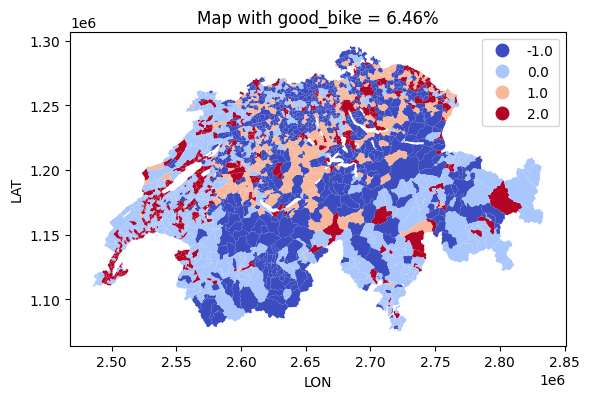

In [60]:
plot_map(gdf, gb)

In [43]:
gdf.VALUE = gdf.VALUE.astype(int)

In [164]:
gdf.to_file('map/values_6.5.geojson', driver='GeoJSON')

In [64]:
def comparison_chat(df, good_bike):
    mean_yes = df.YES_IN_PER.mean()
    #good_bike = np.round(0.06581, 2)

    # Use boolean indexing to set initial value of VALUE column
    df.loc[df.BIKE_STREET_PER >= good_bike, 'VALUE'] = 1
    #df.loc[df.BIKE_STREET_PER < good_bike, 'VALUE'] = -1

    # Use boolean indexing to update VALUE column based on conditions
    df.loc[(df.BIKE_STREET_PER >= good_bike) & (df.YES_IN_PER >= mean_yes), 'VALUE'] += 1
    df.loc[(df.BIKE_STREET_PER < good_bike) & (df.YES_IN_PER < mean_yes), 'VALUE'] -= 1

    return df


In [ ]:
def compariso_chat(df):
    mean_yes = df.YES_IN_PER.mean()
    good_bike = np.round(0.06581, 2)

    # Use boolean indexing to set initial value of VALUE column
    df.loc[df.BIKE_STREET_PER >= good_bike, 'VALUE'] = 1
    df.loc[df.BIKE_STREET_PER < good_bike, 'VALUE'] = -1

    # Use boolean indexing to update VALUE column based on conditions
    df.loc[(df.BIKE_STREET_PER >= good_bike) & (df.YES_IN_PER >= mean_yes), 'VALUE'] += 1
    df.loc[(df.BIKE_STREET_PER < good_bike) & (df.YES_IN_PER < mean_yes), 'VALUE'] -= 1

    return df
